# <p style="text-align: center;">Word Frequency Analysis for Moby Dick</p>

<div style="text-align: center;">
    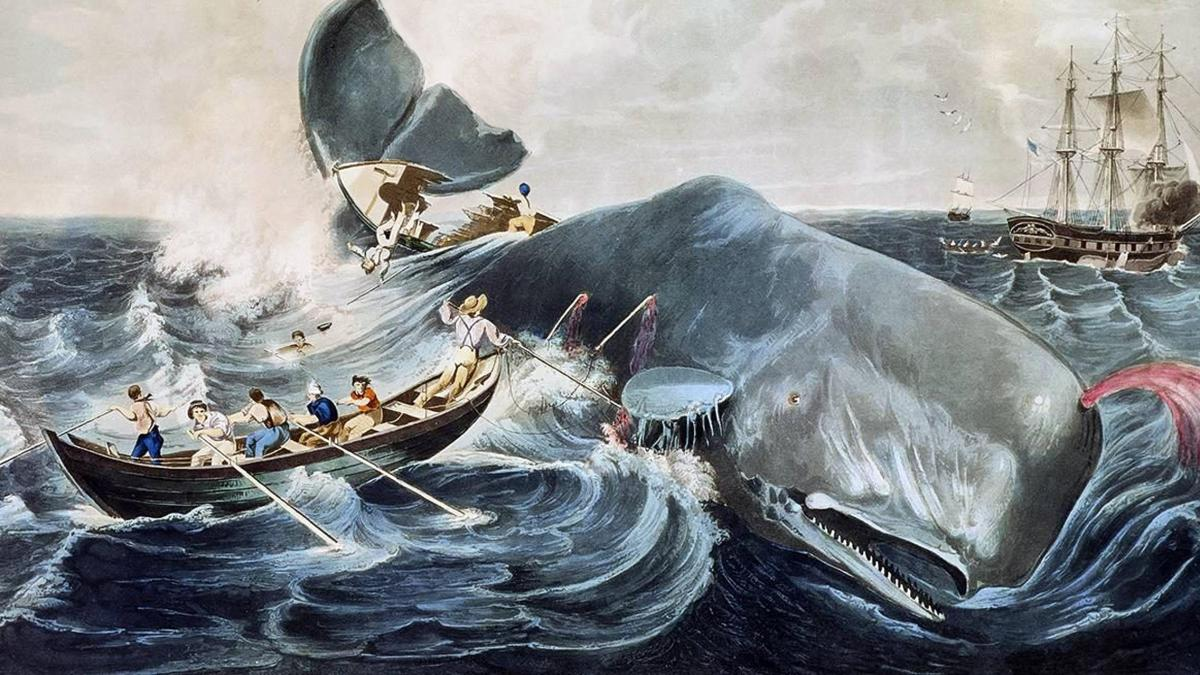
</div>


### Overview

Let's determine the most frequent words in Herman Melville's novel Moby Dick and how often they occur. In this notebook, we'll scrape the novel Moby Dick from the Project Gutenberg website, which hosts a large collection of books, using the ```requests``` Python package. After obtaining the web data, we'll extract words using ```BeautifulSoup```. Finally, we'll analyze the word frequency distribution using the Natural Language Toolkit ```nltk```.

Let's begin by loading in the three packages!

In [1]:
import requests
from bs4 import BeautifulSoup
import nltk

### Getting hands on Moby Dick

To analyze Moby Dick, we need to get the contents of Moby Dick from somewhere. Luckily, the text is freely available online at Project Gutenberg as an HTML file: https://www.gutenberg.org/files/2701/2701-h/2701-h.htm .

**HTML** -  Hypertext Markup Language.It's the standard markup language for web content.

To fetch the HTML file with Moby Dick we're going to use the request package to make a GET request for the website, which means we're getting data from it. This is what's happening in a browser when visiting a webpage, but now i'm getting the requested page directly into Python. 

In [2]:
# Getting Moby Dick (i feel like Captain Ahab) 
r = requests.get("https://s3.amazonaws.com/assets.datacamp.com/production/project_147/datasets/2701-h.htm")

# Setting correct text encoding of the HTML page
r.encoding = 'utf-8'

# Extracting the HTML from our request r
html = r.text

# Printing the first 2000 characters in html
html[:2000]

'<?xml version="1.0" encoding="utf-8"?>\r\n\r\n<!DOCTYPE html\r\n   PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"\r\n   "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd" >\r\n\r\n<html xmlns="http://www.w3.org/1999/xhtml" lang="en">\r\n  <head>\r\n    <title>\r\n      Moby Dick; Or the Whale, by Herman Melville\r\n    </title>\r\n    <style type="text/css" xml:space="preserve">\r\n\r\n    body { background:#faebd0; color:black; margin-left:15%; margin-right:15%; text-align:justify }\r\n    P { text-indent: 1em; margin-top: .25em; margin-bottom: .25em; }\r\n    H1,H2,H3,H4,H5,H6 { text-align: center; margin-left: 15%; margin-right: 15%; }\r\n    hr  { width: 50%; text-align: center;}\r\n    .foot { margin-left: 20%; margin-right: 20%; text-align: justify; text-indent: -3em; font-size: 90%; }\r\n    blockquote {font-size: 100%; margin-left: 0%; margin-right: 0%;}\r\n    .mynote    {background-color: #DDE; color: #000; padding: .5em; margin-left: 10%; margin-right: 10%; font-family: sans-se

### Extracting the text

This HTML is not quite what we want. However, it does contain what we want: the text of Moby Dick. What we need to do now is wrangle this HTML to extract the text of the novel. For this we'll use the package BeautifulSoup.

In [4]:
# Creating a BeautifulSoup object from the HTML
soup = BeautifulSoup(html,"xml")

# Getting the text out of the soup
text = soup.get_text()

# Printing out text between characters 45000 and 47000
text[45000:47000]

'st of them all, one grand\n      hooded phantom, like a snow hill in the air.\n    \n\n\n \n\n\n\n\n\n      CHAPTER 2. The Carpet-Bag.\n    \n\n      I stuffed a shirt or two into my old carpet-bag, tucked it under my arm,\n      and started for Cape Horn and the Pacific. Quitting the good city of old\n      Manhatto, I duly arrived in New Bedford. It was a Saturday night in\n      December. Much was I disappointed upon learning that the little packet for\n      Nantucket had already sailed, and that no way of reaching that place would\n      offer, till the following Monday.\n    \n\n      As most young candidates for the pains and penalties of whaling stop at\n      this same New Bedford, thence to embark on their voyage, it may as well be\n      related that I, for one, had no idea of so doing. For my mind was made up\n      to sail in no other than a Nantucket craft, because there was a fine,\n      boisterous something about everything connected with that famous old\n      island

Keep in mind that \n represents the beginning of a new line, so nothing to worry about, we correctly extracted all the text we need!

### Taking a look at the words

Since we now extracted all of the text, let's look at the frequency of the actual words we wanna know more about.There is some unwanted stuff at the start and some unwanted stuff at the end. We could remove it, but this content is so much smaller in amount than the text of Moby Dick that, to a first approximation, it is okay to leave it in.

Now it's time to count how many times each word appears, and for this we'll use nltk – the Natural Language Toolkit. We'll start by tokenizing the text, that means to remove everything that isn't a word (whitespace, commas,...) and then split the text into a list of words.

In [5]:
# Creating a tokenizer-> regular expression tokenizer with w+ pattern means ignoring whitespaces and txt to words etc...
tokenizer = nltk.tokenize.RegexpTokenizer(pattern='\w+')

# Tokenizing the text
tokens = tokenizer.tokenize(text=text)

# Printing out the first 8 words (tokens)
tokens[:8]

['Moby', 'Dick', 'Or', 'the', 'Whale', 'by', 'Herman', 'Melville']

That worked quite well!

Theres one small thing we have to do before we start the analysis.

### Convert all Tokens to Lowercase

Since we do not want to treat for example 'or' and 'Or' as two seperate statistical elements, we have to make 
sure that they become the same element which we can do by just making sure that every token will be converted 
to a lowercase letter token.

In [6]:
# new list to hold lowercase words
words = [token.lower() for token in tokens]

# Printing out the first 8 words again
words[:8]

['moby', 'dick', 'or', 'the', 'whale', 'by', 'herman', 'melville']

### Stop Words

Nltk contains a list of several commonly used stop words which we can load into our python file and make sure our 
analysis only refers to words that are important.For example the word 'the' would not be of the same importance
for our analysis as the word 'captain' or 'whale'.

See the nltk documentation for [how to load in the stop words](https://www.nltk.org/book/ch02.html#wordlist-corpora).

In [7]:
nltk.download('stopwords')

# Getting the English stop words from nltk
sw = nltk.corpus.stopwords.words('english')

# Printing out first eight stop words
sw[:8]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tim\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves']

### Remove the stop words from our token list

In [8]:
# A new list to hold Moby Dick with No Stop words
words_nostop = [word for word in words if word not in sw]

# Printing the first 5 words_ns to check that stop words are gone
words_nostop[:5]

['moby', 'dick', 'whale', 'herman', 'melville']

Our original question was:

    What are the most frequent words in Herman Melville's novel Moby Dick and how often do they occur?

We are now ready to answer that! Let's create a word frequency distribution plot using nltk.

See the nltk documentation for [how to use nltk.FreqDist()](https://www.nltk.org/book/ch01.html#frequency-distributions)


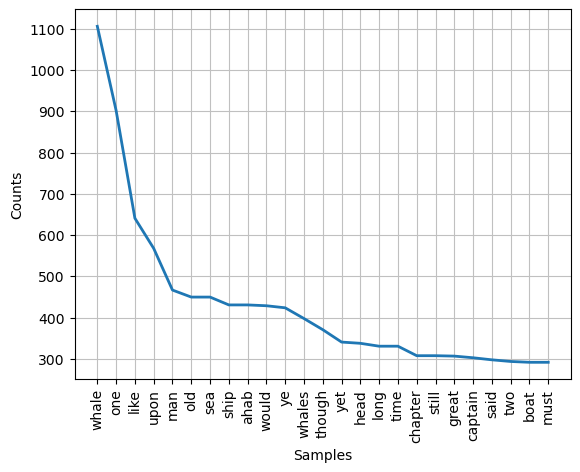

<Axes: xlabel='Samples', ylabel='Counts'>

In [9]:
# This command displays figures inside this notebook
%matplotlib inline

# Creating word frequency distribution
freqdist = nltk.FreqDist(words_nostop)

# Plotting word frequency distribution
freqdist.plot(25)


### Most common word

With the help of just three simple but genius libraries, we could quickly conduct a small analysis of the old novel "moby dick".🐳

The answer to our question would be the following:


In [ ]:
# What's the most frequently used word?

answer = 'whale'

That was...let's say unexpected! 